# Exercise set 4: Principal component analysis and clustering

The main goals of this exercise are to perform principal component analysis (PCA) and k-means clustering.


**Learning Objectives:**

After completing this exercise set, you will be able to:

* Run PCA to reduce the dimensionality of a data set.
* Visualise PCA results by creating score plots (showing data point projections), loading plots (illustrating variable influence), and variance-explained plots (indicating component significance).
* Interpret results from PCA by inspecting the scores and loadings plots to explain groupings and variable contributions.
* Run k-means clustering for a data set and use the [elbow method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#Elbow_method) to select the best number of clusters.



**To get the exercise approved, complete the following problems:**

- [4.1(a)](#4.1(a)) and [4.1(b)](#4.1(b)): to show that you can perform PCA and plot the scores and the variance explained per principal component.
- [4.2(a)](#4.2(a)) and [4.2(b)](#4.2(b)): to show that you can also plot the loadings from PCA, and interpret the scores and loadings.
- [4.3(a)](#4.3(a)): to show that you can apply k-means clustering to a data set and select the best number of clusters

In [65]:
%reset -f

## Exercise 4.1 Molecular conformations

We have performed molecular dynamics simulations to model the various conformations a molecule can adopt. We have collected 4004 snapshots, each representing a conformation and we have recorded the 3D coordinates of each atom in each conformation.

The file `molecule.csv` contains these coordinates, organized as follows:

* Each row represents a single molecular conformation.
* The columns contain the x, y, and z coordinates of each atom.
* The column labels follow a pattern:
   * `1x`, `1y`, `1z` represent the coordinates of atom 1,
   * `2x`, `2y`, `2z` those of atom 2, and so on, up to atom 22.

Here is a snippet of the data (first three conformations/rows):

|     |    1x |    1y |    1z |    2x | ... |   22x |   22y |   22z |
|----:|------:|------:|------:|------:|:---:|------:|------:|------:|
|   0 | 14.585 | 13.725 | 12.373 | 13.759 | ... | 14.882 | 14.462 | 10.500 |
|   1 | 14.585 | 13.868 | 12.458 | 13.773 | ... | 15.061 | 14.033 | 10.411 |
|   2 | 14.668 | 13.689 | 12.557 | 13.667 | ... | 14.914 | 14.276 | 10.359 |


Our goal is to use Principal Component Analysis (PCA) to determine if we can identify distinct groups or clusters of these molecular conformations based on their atomic coordinate data.

In [66]:
# The raw data can be loaded as follows:
import pandas as pd

data1 = pd.read_csv("molecule.csv")
data1.head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,19z,20x,20y,20z,21x,21y,21z,22x,22y,22z
0,14.585,13.725,12.373,13.759,12.631,13.162,15.657,13.504,12.619,14.341,...,11.055,12.535,14.790,10.204,14.629,12.756,10.541,14.882,14.462,10.500
1,14.585,13.868,12.458,13.773,12.721,13.075,15.642,13.816,12.678,14.094,...,11.039,12.686,14.848,10.264,14.340,12.467,10.898,15.061,14.033,10.411
2,14.668,13.689,12.557,13.667,12.552,12.999,15.702,13.482,12.568,14.269,...,11.010,12.668,14.891,10.285,14.508,12.630,10.714,14.914,14.276,10.359
3,14.717,13.715,12.537,13.626,12.541,13.014,15.726,13.543,12.762,14.485,...,11.009,12.531,14.839,10.421,14.344,12.617,10.793,14.968,14.284,10.422
4,14.587,13.724,12.362,13.744,12.627,13.169,15.654,13.490,12.586,14.438,...,10.993,12.558,14.805,10.259,14.597,12.708,10.470,14.847,14.517,10.420


### 4.1(a)

**Task: Run PCA on this data set and plot the variance explained as a function of the principal components, for instance in a bar plot or a line plot. How much of the variance is explained by principal components 1 and 2?**

**Hints:** Assuming that `X` contains our data, a PCA can be carried out as follows:

```python
from sklearn.decomposition import PCA
pca = PCA()
scores = pca.fit_transform(X)
```

This will store the scores in the variable `scores` which can be directly used in a scatter plot.
It is also useful to inspect
how much of the variance each principal component is explaining.
The fraction of the variance explained by each component can be accessed via:
```python
variance = pca.explained_variance_ratio_
```

**Note:** The raw data has already been scaled so you can use it directly without preprocessing.

In [67]:
# Your code here
from sklearn.decomposition import PCA

pca    = PCA(n_components='mle') 
scores = pca.fit_transform(data1) 
loadings = pca.components_.T 
variance = pca.explained_variance_ratio_

PC1: 72.6%, PC2: 17.4%


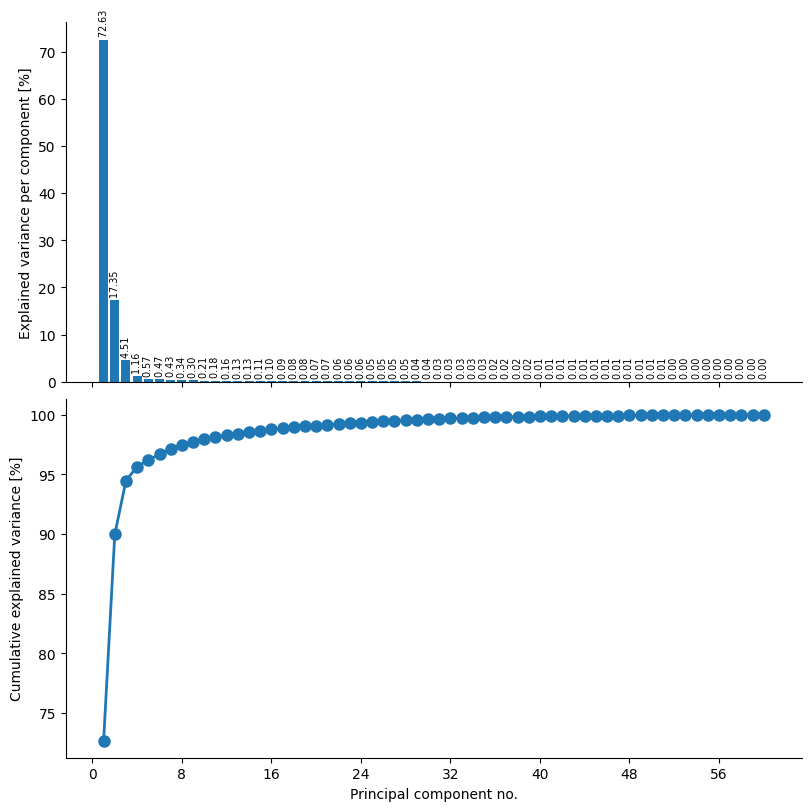

In [68]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, nrows=2, figsize=(8, 8), sharex=True, 
    ) 

var_cumulsum = np.cumsum(variance) 
components = 1 + np.arange(len(variance))

bar = ax1.bar(components, variance * 100.0)
ax1.bar_label(bar, fmt=" {:.2f}", rotation=90, fontsize='x-small')
ax2.plot(components, var_cumulsum * 100.0, marker="o", markersize=8, lw=2)

for ax in fig.get_axes(): ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax2.set_xlabel("Principal component no.")
ax1.set_ylabel("Explained variance per component [%]")
ax2.set_ylabel("Cumulative explained variance [%]")

print(f"PC1: {variance[0]*100:.3g}%, PC2: {variance[1]*100:.3g}%")

sns.despine(fig=fig)

In [69]:
import sklearn
import pandas as pd 

def get_ordinal_suffix(n):
    if 11 <= (n % 100) <= 13:
        return f'{n}th'
    else:
        return f'{n}{["th", "st", "nd", "rd", "th", "th", "th", "th", "th", "th"][n % 10]}'

def get_important_features(n: int, pca: sklearn.decomposition._pca.PCA, initial_feature_names: list) -> pd.DataFrame: 
    '''
    n : number of features for each component
    pca : pca object as returned from sklearn.decomposition.PCA
    initial_feature_names : names of the initial features
    '''
    # Get the index of the most important feature on EACH component
    n_pcs = pca.n_components_
    important_indices = [np.abs(pca.components_[i]).argsort()[-n:][::-1] for i in range(n_pcs)]

    # Create a dictionary to store the important features
    #  and add columns for each important feature 
    dic = {'Principal Component': ['PC{}'.format(i) for i in range(1,n_pcs+1)]}
    for j in range(n):
        dic[f'{get_ordinal_suffix(j+1)} Most Imp. Feature'] = [initial_feature_names[indices[j]] for indices in important_indices]
    df = pd.DataFrame(dic)
    return df 

In [70]:
# Build and display the dataframe
imp_feat_pca = get_important_features(4, pca, data1.columns)

try: display(imp_feat_pca.iloc[0:np.argwhere(np.cumsum(variance)>0.95)[0][0]+1,:])
except IndexError: print("The chosen number of PCs (n_components) cannot explain more than 95% of the variance!")

,Principal Component,1st Most Imp. Feature,2nd Most Imp. Feature,3rd Most Imp. Feature,4th Most Imp. Feature
0,PC1,21y,16y,18y,20y
1,PC2,6y,3y,6x,21y
2,PC3,14y,13x,11y,10x
3,PC4,20z,7z,18z,4x


In [71]:
print(variance[:2]*100)

[72.62604201 17.35264508]


#### Your answer to question 4.1(a): How much of the variance is explained by principal components 1 and 2?

<span style="color:magenta">

- PC1 explains 72.6%
- PC2 explains 17.4%

</span>

### 4.1(b)

**Task: Create a scatter plot where you show the scores for PC1 and PC2 (the data projection onto the first two principal components). Can you see any groups in your data?** 

C:\Users\haavarug\AppData\Local\Temp\ipykernel_19108\1168222840.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


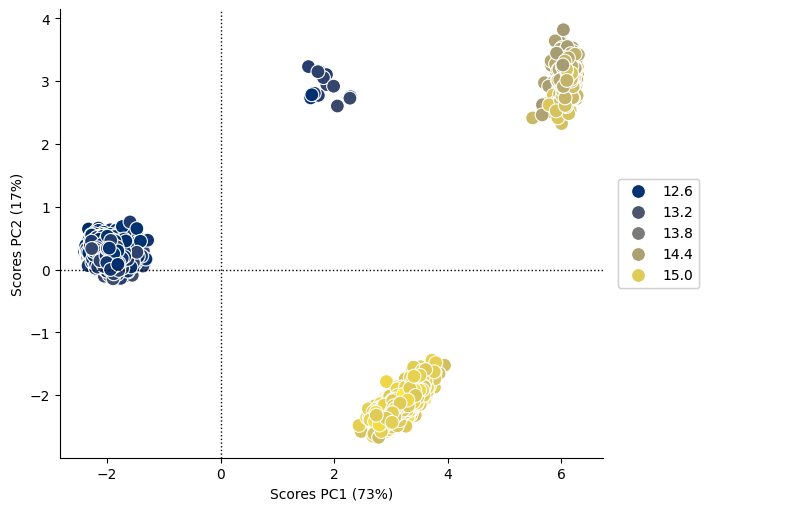

In [72]:
# Your code here
fig, (ax, axL) = plt.subplots(ncols=2, constrained_layout=True, figsize=(8, 5), width_ratios=[1,0.35])
ax.axhline(y=0, ls=":", c="k", lw=1)
ax.axvline(x=0, ls=":", c="k", lw=1)

sns.scatterplot(
    data=data1, x=scores[:, 0], y=scores[:, 1], ax=ax, s=100, 
    hue='21y', palette="cividis", 
    size=None, sizes=(50, 200),
    style=None, style_order=None, 
    legend="auto", 
    )

# Axis styling 
ax.set_xlabel(f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set_ylabel(f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

# Make legend and put in axL
handles, labels = ax.get_legend_handles_labels()
if ax.legend_: ax.legend_.remove() 
L1 = axL.legend(handles[:12], labels[:12], loc='center left', ncols=1)
axL.add_artist(L1)

# Fix spines, especially for axL 
sns.despine(fig=fig)
axL.spines['left'].set_visible(False)
axL.spines['bottom'].set_visible(False)
axL.tick_params(left=False, bottom=False) 
axL.set_xticklabels([])
axL.set_yticklabels([])
ax1.set_aspect('equal', 'datalim')

fig.show()

#### Your answer to question 4.1(b): Do you see any clusters in your plot of the scores?

<span style="color:magenta">
Yes, I can see 4 main clusters, wherein one may consist of 2 sub-clusters. 
</span>

### 4.1(c)


**Task: Use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to investigate if there are any clusters in the data. Create a scatter plot of the t-SNE scores to visualize the data. Do you see any clusters?**

**Hint:** Assuming that `X` contains our data, dimensionality reduction by t-SNE can be carried out as follows:

```python
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_scores = tsne.fit_transform(X)
```

In [73]:
# Your code here
from sklearn.manifold import TSNE

tsne_input  = {"n_components": 2, 
               "perplexity": 20, #5-50 is recommnded, increasing with size of dataset 
               "early_exaggeration": 12, #default=12, how tight are the clusters in the org. high N space 
               "learning_rate": 60, #usually 10-1000, can be 'auto'. How ball-like the points in the low N space are 
               "metric": "euclidean", #Note: Riemannian distance --> UMAP 
               }

tsne        = TSNE(**tsne_input, random_state=2025) 
tsne_scores = tsne.fit_transform(data1) 

C:\Users\haavarug\AppData\Local\Temp\ipykernel_19108\570094252.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


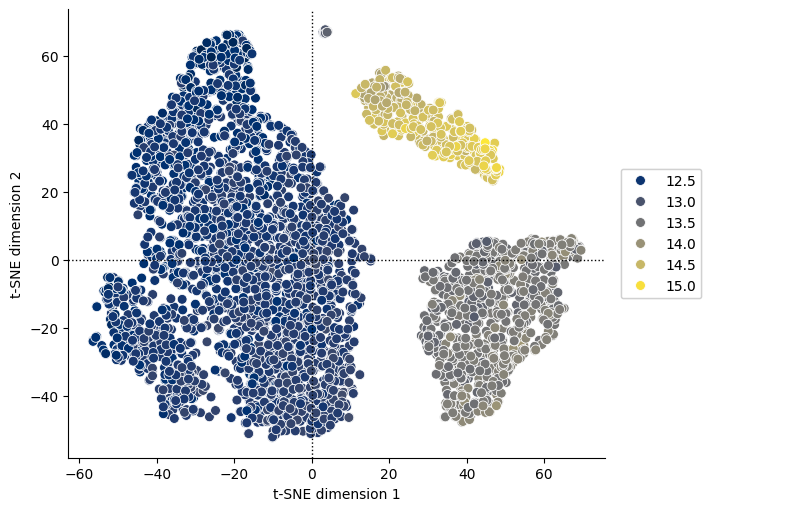

In [74]:
# Your code here
fig, (ax, axL) = plt.subplots(ncols=2, constrained_layout=True, figsize=(8, 5), width_ratios=[1,0.35])
ax.axhline(y=0, ls=":", c="k", lw=1)
ax.axvline(x=0, ls=":", c="k", lw=1)

sns.scatterplot(
    data=data1, x=tsne_scores[:, 0], y=tsne_scores[:, 1], ax=ax, s=50, 
    hue='20x', palette="cividis", 
    size=None, sizes=(50, 200),
    style=None, style_order=None, 
    legend="auto", 
    )

# Axis styling 
ax.set_xlabel(f"t-SNE dimension 1")
ax.set_ylabel(f"t-SNE dimension 2")

# Make legend and put in axL
handles, labels = ax.get_legend_handles_labels()
if ax.legend_: ax.legend_.remove() 
L1 = axL.legend(handles[:12], labels[:12], loc='center left', ncols=1)
axL.add_artist(L1)

# Fix spines, especially for axL 
sns.despine(fig=fig)
axL.spines['left'].set_visible(False)
axL.spines['bottom'].set_visible(False)
axL.tick_params(left=False, bottom=False) 
axL.set_xticklabels([])
axL.set_yticklabels([])
ax1.set_aspect('equal', 'datalim')

fig.show()

#### Your answer to question 4.1(c): Do you see any clusters when you plot the t-SNE scores?

<span style="color:magenta">
Yes, I can see 3, maybe 4 or 5, clusters. 
</span>

## Exercise 4.2 Detection of milk adulteration

[Prabowo](https://doi.org/10.5281/zenodo.13766649) recently investigated the feasibility of using a regular smartphone for milk quality analysis, specifically for the detection of adulteration.

Prabowo used image analysis techniques to extract information from digital images of various milk samples, including pure milk, milk adulterated with rice water, and milk contaminated with lead(II)-ions. The images were captured using a smartphone (iPhone 13 Pro) under controlled conditions to ensure consistency in lighting, zoom, and distance. From the images, 4 numerical values were extracted:

* The intensity of the red, green, and blue colour components from an area in the middle of the sample.
* The amount of grey colour in the same area.

This data can be found in the file [milk.csv](./milk.csv) which contains the following columns:

* `Red`: the red colour component intensity
* `Green`: the green color component intensity
* `Blue`: the blue colour component intensity
* `Red/Blue`: the ratio of the red to blue colour component intensity
* `Red/Green`: the ratio of the red to green colour component intensity
* `Blue/Green`: the ratio of the blue to green colour component intensity
* `Grey`: the average grey pixel intensity
* `Type`: a text describing the sample (type of milk pictured):
    * `Milk (control)`: Samples of pure milk
    * `Rice water (control)`: Samples of pure rice water mixtures
    * `Milk + rice water`: Samples created by mixing pure milk with rice water. This simulates adultered milk.
    * `Milk + lead`: Samples created by mixing pure milk with lead of various concentrations. This simulates lead-contaminated milk.

We will investigate if we can use this data to distinguish between the different types by performing principal component analysis.

### 4.2(a)

**Tasks:**
1. **Load the data set and perform PCA to obtain the scores. Scale the data before performing PCA.**
2. **Create scatter plots of the scores (you can investigate different combinations of principal components), colour the samples according to their type and investigate visually if the different sample types appear as distinct clusters.**

**Hints:**

1. In this case, the analysis may benefit from standardisation of the variance (since we may have different units or natural scales for the numbers). Assuming that our data is stored in the matrix `X`, we can standardise it as follows:
```python
from sklearn.preprocessing import scale
X_scaled = scale(X)
```

2. Coloring a scatter plot according to a column in a Pandas data frame can be done with [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) from seaborn:
```python
import pandas as pd
import seaborn as sns

data2 = pd.read_csv("milk.csv")  # load data

# ... assuming scores contain the PCA scores:
sns.scatterplot(
    data=data2,  # select the data frame
    x=scores[:, 0],  # select data to put on the x-axis
    y=scores[:, 1],  # select data to put on the y-axis
    hue="Type",  # select data to use for colouring (column from data2)
)
```

In [75]:
# Your code here
data2 = pd.read_csv("milk.csv")
display(data2.head())
print(data2["Type"].unique().shape)

,Red,Green,Blue,Red/Blue,Red/Green,Blue/Green,Grey,Type
0,197.572,189.572,153.572,1.287,1.042,0.000810,141.940,Milk (control)
1,198.364,190.231,154.630,1.283,1.043,0.000813,137.579,Milk (control)
2,197.625,189.625,153.625,1.286,1.042,0.000810,148.488,Milk (control)
3,202.659,195.843,160.289,1.264,1.035,0.000818,141.783,Milk (control)
4,205.245,197.405,161.643,1.270,1.040,0.000819,139.688,Milk (control)


(4,)


In [76]:
from sklearn.preprocessing import StandardScaler, scale

Y = data2['Type']
X_scaled = scale(data2.drop(columns=['Type'])) # = StandardScaler().fit_transform(data2.drop(columns=['Type']))

pca      = PCA(n_components='mle') 
scores   = pca.fit_transform(X_scaled) 
loadings = pca.components_.T 
variance = pca.explained_variance_ratio_

C:\Users\haavarug\AppData\Local\Temp\ipykernel_19108\3207605697.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


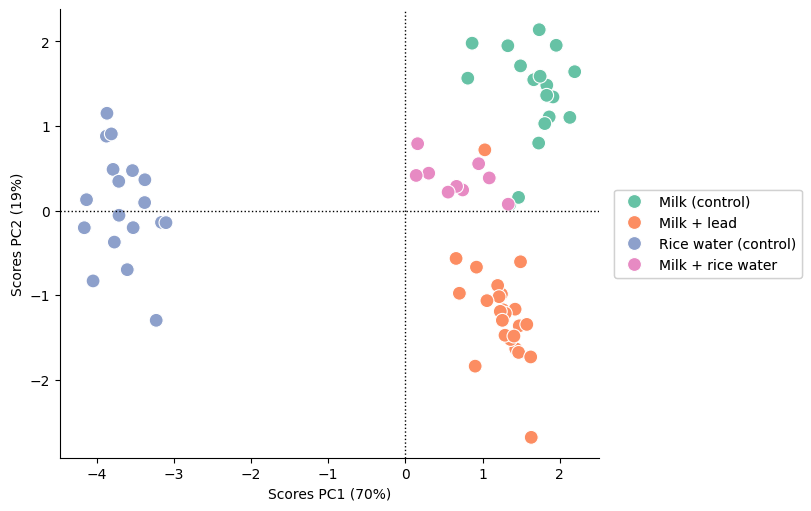

In [77]:
# Your code here
fig, (ax, axL) = plt.subplots(ncols=2, constrained_layout=True, figsize=(8, 5), width_ratios=[1,0.35])
ax.axhline(y=0, ls=":", c="k", lw=1)
ax.axvline(x=0, ls=":", c="k", lw=1)

PC1,PC2 = 0,1 #{0,1,2,3,4}
sns.scatterplot(
    data=data2, x=scores[:, PC1], y=scores[:, PC2], ax=ax, s=100, 
    hue='Type', palette="Set2", 
    size=None, sizes=(50, 200),
    style=None, style_order=None, 
    legend="auto", 
    )

# Axis styling 
ax.set_xlabel(f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set_ylabel(f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

# Make legend and put in axL
handles, labels = ax.get_legend_handles_labels()
if ax.legend_: ax.legend_.remove() 
L1 = axL.legend(handles[:12], labels[:12], loc='center left', ncols=1)
axL.add_artist(L1)

# Fix spines, especially for axL 
sns.despine(fig=fig)
axL.spines['left'].set_visible(False)
axL.spines['bottom'].set_visible(False)
axL.tick_params(left=False, bottom=False) 
axL.set_xticklabels([])
axL.set_yticklabels([])
ax1.set_aspect('equal', 'datalim')

fig.show()

#### Your answer to question 4.2(a): Do the different sample types appear as distinct clusters?

<span style="color:magenta">
Only the `Rice water (control)` and maybe `Milk + lead`
</span>

### 4.2(b)

**Tasks: Interpret the scores plot(s) to identify the variables that contribute most significantly to the observed clusters, specifically:**

1. **Which variables are most influential in discriminating between pure rice water and samples containing milk?**
2. **Which variables are most influential in discriminating between pure milk and lead-contaminated milk samples?**

**(Use loading plots to guide your interpretation.)**


**Hint:** Create a scatter plot of the loadings to show their importance for different principal
components and interpret ths together with the scores. Scatterplots can be created as follows (assuming that `pca` is a `PCA` object from scikit-learn, and that the variables used are stored in a list `variables`):
```python
from matplotlib import pyplot as plt

loadings = pca.components_.T  # Extract the loadings
variables = [
    "Red",
    "Green",
    "Blue",
    "Red/Blue",
    "Red/Green",
    "Blue/Green",
    "Grey",
]  # Store variable names
fig, ax = plt.subplots()  # Create empty plot
ax.scatter(loadings[:, 0], loadings[:, 1])  # Scatter plot of the loadings

for i, text in enumerate(variables):
    # Add the name of the variable as text next to the scatter points:
    ax.text(loadings[i, 0], loadings[i, 1], text, fontsize="small")  
``` 

In [78]:
# Your code here
imp_feat_pca = get_important_features(4, pca, data2.columns[:-1])
imp_feat_pca

,Principal Component,1st Most Imp. Feature,2nd Most Imp. Feature,3rd Most Imp. Feature,4th Most Imp. Feature
0,PC1,Red,Blue/Green,Green,Blue
1,PC2,Red/Green,Red/Blue,Grey,Blue
2,PC3,Grey,Blue,Green,Red/Green
3,PC4,Blue/Green,Red/Green,Red/Blue,Blue
4,PC5,Red/Blue,Blue/Green,Red/Green,Red


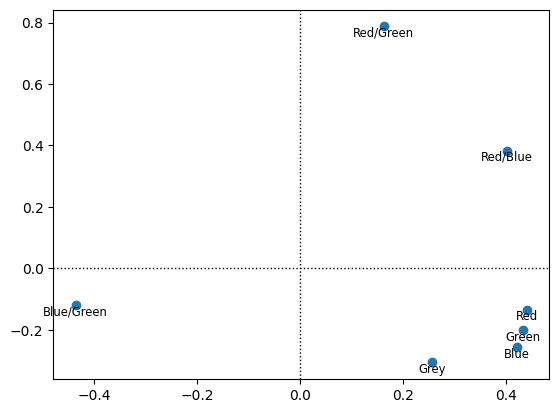

In [79]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()  # Create empty plot
ax.axhline(y=0, ls=":", c="k", lw=1)
ax.axvline(x=0, ls=":", c="k", lw=1)

x, y = loadings[:, 0], loadings[:, 1]

ax.scatter(x, y) # Scatter plot of the loadings

for i, text in enumerate(data2.columns[:-1]):
    # Add the name of the variable as text next to the scatter points:
    ax.text(x[i], y[i], text, fontsize="small", va='top', ha='center') 

#### Your answer to question 4.2(b): What variables are important for distinguishing between (1) pure rice water and samples containing milk, and (2) samples of pure milk and milk contaminated by lead?

**1)**: "pure rice" and "milk" samples are distinguished from PC1 $\to$ *Red*, *Blue/Green*, *Green*, *Blue*, *Red/Blue*, (*Grey*)

**2)**: "pure milk" and "milk + lead" samples are distinguished from PC2 $\to$ *Red/Green*, *Red/Blue*,	(*Grey*, *Blue*) 

## Exercise 4.3 Clustering

In [Exercise 4.1](#Exercise-4.1-Molecular-conformations), we analysed molecular conformations using PCA. The file [scores.4.1.csv](./scores.4.1.csv) contains the scores for principal components 1 (column `PC1`) and 2 (column `PC2`). In this exercise, we will investigate if we can find clusters in this data by applying [k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering.

### 4.3(a)

**Tasks:**
1. **Load the data from [scores.4.1.csv](./scores.4.1.csv) and perform k-means clustering, considering the number of clusters (k) from 1 to 10**
2. **Plot the within-cluster sum of squared distances of the samples to their closest cluster centre as a function of the number of clusters (k).**
3. **Use the plot created above (the "elbow method") to identify the best number of clusters. Explain your reasoning for selecting the best number of clusters.**

**Hint:** scikit-learn can perform [k-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Here is one example to perform it for 3 clusters:
```python
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv("scores.4.1.csv")  # Load the data
# Set up the k-means method to look for 3 clusters:
cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Print out cluster centers:
print(cluster.cluster_centers_)
# Print out the within-cluster sum of squared distances of samples to their closest cluster centre:
print(cluster.inertia_)
```

**Note:** The elbow method is a heuristic, and does not always provide a clear answer.

In [80]:
# Your code here
from sklearn.cluster import KMeans
data2b = pd.read_csv("scores.4.1.csv")

sse = {} 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2b)
    sse[k] = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center

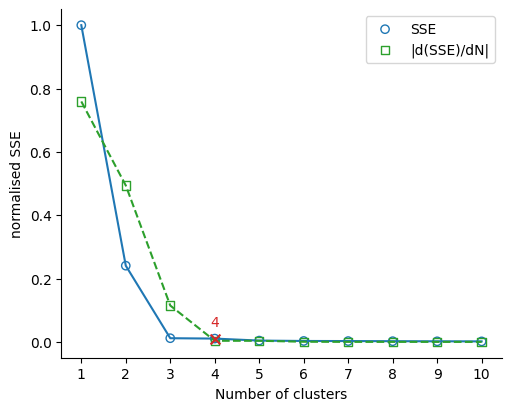

In [81]:
fig, ax = plt.subplots(
    constrained_layout=True, nrows=1, figsize=(5, 4), 
    ) 
x = list(sse.keys())
y = list(sse.values()) / max(np.abs(list(sse.values())))
ax.scatter(x, y, marker='o', color='tab:blue', label='SSE', facecolor='none') 
ax.plot(x, y, marker='none', color='tab:blue', ls='-', label=None) 

dy = np.abs(np.gradient(y)) 
ax.scatter(x, dy, marker='s', color='tab:green', label='|d(SSE)/dN|', facecolor='none')
ax.plot(x, dy, marker='none', color='tab:green', ls='--', label=None) 

n = 4
ax.scatter(n, y[n-1], marker='x', s=50, color='tab:red', zorder=2)
ax.text(n, y[n-1]+0.05, n, fontsize='medium', ha='center', va='center', color='tab:red', zorder=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_ylabel("normalised SSE")
ax.set_xlabel("Number of clusters")

ax.legend()

sns.despine(fig=fig)

#### Your answer to question 4.3(a): What is the best number of clusters, and how did you select it?

<span style="color:magenta">
n_cluster = 4, selected based on derivative of the SSE vs. n (Elbow method) AND the PC1 vs. PC2 plot in task 4.1(b).  
</span>

### 4.3(b)

The [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) measures how similar a data point is to its own cluster compared to other clusters, and can be used to select the best number of clusters by comparing silhouette values for different clusterings.


**Task: Calculate the mean silhouette score for 2 to 10 clusters. Plot the mean silhouette value as a function of the number of cluster centres. What is the best number of clusters to use, based on this plot? Explain your reasoning for selecting the best number of clusters.**

**Hint:** Given a clustering, you can find the silhouette value as follows:
```python
from sklearn.metrics import silhouette_score

cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Get what cluster the different points are assigned to:
cluster_labels = cluster.predict(data)
silhouette_mean = silhouette_score(data, cluster_labels)
print(silhouette_mean)
```

**Note:** The silhouette score is *not defined* for 1 cluster. (Can you explain why?)

**Note:** The silhouette score is also a heuristic, and does not always provide a clear answer.

In [82]:
# Your code here
from sklearn.metrics import silhouette_score

sil_coeff = {}
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2b)
    kmeans_labels = kmeans.predict(data2b)
    sil_coeff[k]  = silhouette_score(data2b, kmeans_labels, metric='euclidean')

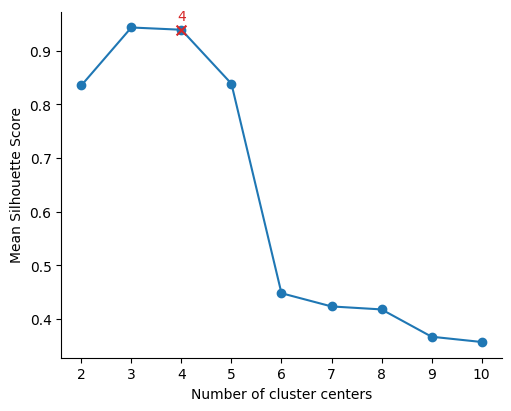

In [83]:
fig, ax = plt.subplots(
    constrained_layout=True, nrows=1, figsize=(5, 4), 
    ) 
x = list(sil_coeff.keys())
y = list(sil_coeff.values()) 
ax.plot(x, y, marker='o', ls='-')

n = 4 
ax.scatter(n, y[n-2], marker='x', s=50, color='tab:red', zorder=2)
ax.text(n, y[n-2]+0.025, n, fontsize='medium', ha='center', va='center', color='tab:red', zorder=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_ylabel("Mean Silhouette Score")
ax.set_xlabel("Number of cluster centers")

sns.despine(fig=fig)

#### Your answer to question 4.3(b): What is the best number of clusters, and how did you select it?

<span style="color:magenta">
n_cluster = 4, selected based on the Elbow and Solhouette Methods, and the PC1 vs. PC2 plot in task 4.1(b).  
</span>

### 4.3(c)

The [Gap statistic](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_gap_statistics) compares the total within-cluster dispersion (often represented as the sum of pairwise distances within each cluster, W) with what we would expect for uniformly randomly distributed points (Ŵ). The optimal number of clusters is the point where the "Gap", which is the difference between log(W) and log(Ŵ), is largest.


**Task: Obtain and plot the Gap statistic value as a function of the number of cluster centres (consider 1 to 10 clusters). What is the best number of clusters to use, based on this plot? Explain your reasoning for selecting the best number of clusters.**

**Hint:** The Gap statistic can be obtained via the [gapstat](https://github.com/jmmaloney3/gapstat) package. If you do not have this one installed, you can install it via (in a terminal):

```bash
pip install git+https://github.com/jmmaloney3/gapstat
```

To install it directly from a Jupyter notebook, you need to add a "!" in front of the command:
```bash
!pip install git+https://github.com/jmmaloney3/gapstat
```

To calculate the Gap statistic:

```python
from gapstat import gapstat_score

cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Get what cluster the different points are assigned to:
cluster_labels = cluster.predict(data)

gap, _, _, _, error = gapstat_score(
    data, cluster_labels, k=3, calcStats=True
)

# gap = the Gap statistic
# error = standard deviation for the Gap statistic
```

**Note:** The Gap statistic is also a heuristic, and does not always provide a clear answer.

In [84]:
# Your code here
from gapstat import gapstat_score

gaps = {}
errors = {}
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2b)
    kmeans_labels = kmeans.predict(data2b)
    gap, _, _, _, error = gapstat_score(data2b, kmeans_labels, k=k, calcStats=True)
    gaps[k] = gap
    errors[k] = error

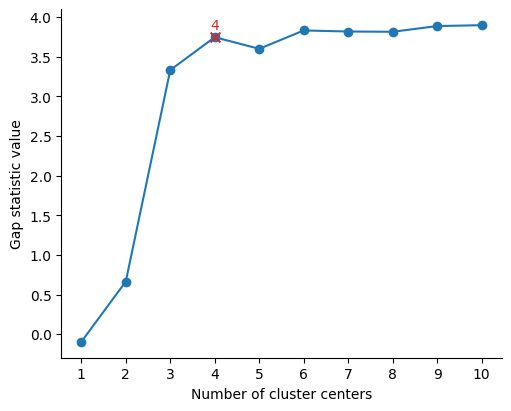

In [90]:
fig, ax = plt.subplots(
    constrained_layout=True, nrows=1, figsize=(5, 4), 
    ) 
x = list(gaps.keys())
y = list(gaps.values()) 
ax.plot(x, y, marker='o', ls='-')

n = 4 
ax.scatter(n, y[n-1], marker='x', s=50, color='tab:red', zorder=2)
ax.text(n, y[n-1]+0.15, n, fontsize='medium', ha='center', va='center', color='tab:red', zorder=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_ylabel("Gap statistic value")
ax.set_xlabel("Number of cluster centers")

sns.despine(fig=fig)

#### Your answer to question 4.3(c): What is the best number of clusters, and how did you select it?

*Double click here*

### 4.3(d)

**Task: Repeat [4.3(a)](#4.3(a))-[4.3(c)](#4.3(c)), but use the original data in [molecule.csv](./molecule.csv) instead of the PCA scores. What is the best number of clusters? Explain your reasoning for selecting the best number of clusters.**

In [92]:
# Your code here
from gapstat import gapstat_score

data3b = pd.read_csv("molecule.csv")

sse = {} 
sil_coeff = {}
gaps = {}

for k in range(2, 11): 
    data = data3b
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    kmeans_labels = kmeans.predict(data)
    gap, _, _, _, error = gapstat_score(data, kmeans_labels, k=k, calcStats=True)
    sse[k]       = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center
    sil_coeff[k] = silhouette_score(data, kmeans_labels, metric='euclidean')
    gaps[k]      = gap


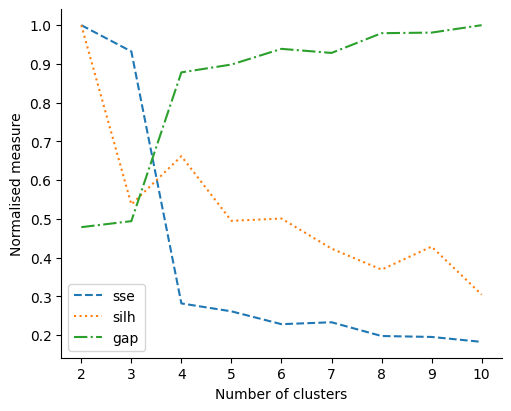

In [104]:
fig, ax = plt.subplots(
    constrained_layout=True, figsize=(5, 4), 
    ) 

x = range(2, 11)

ls     = ['--', ':', '-.']
labels = ['sse', 'silh', 'gap']
dicts  = [sse, sil_coeff, gaps]
for i, d in enumerate(dicts): 
    y = list(d.values()) / np.max(list(d.values()))
    ax.plot(x, y, c=f"C{i}", ls=ls[i], label=labels[i])

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_ylabel("Normalised measure")
ax.set_xlabel("Number of clusters")
ax.legend()

sns.despine(fig=fig)

#### Your answer to question 4.3(d): What is the best number of clusters, and how did you select it?

<span style="color:magenta">
No clear best no. of clusters
</span>

### 4.3(e)

**Task: Repeat the clustering of the data in [scores.4.1.csv](./scores.4.1.csv), but use the density-based method [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). How many clusters were identified by DBSCAN?**

**Hint:** Assuming that the matrix `X` contains our raw data, DBSCAN clustering can be performed with:
```python
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit(X)
```

**Note:** The results from DBSCAN may depend on the hyperparameters `eps` and `min_samples`. Explore different values for these parameters and investigate how they affect the number of clusters and noise points identified. Consider visualising the clusters or calculating silhouette scores.



**Hint:** Assuming that the matrix `X` contains our raw data, DBSCAN clustering can be performed with:
```python
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit(X)
```

In [87]:
# Your code here

#### Your answer to question 4.3(e): How many clusters did you find with DBSCAN? How is this influenced by the hyperparameters?

*Double click here*

## Your feedback for Exercise 4

1. **Time & Difficulty:**
    * Length (1=too short, 5=too long): 1  2  3  4  5
    * Difficulty (1=too easy, 5=too difficult): 1  2  3  4  5
    * Most challenging part: _________________________

2. **Code Examples:**
    * More or less example code?  More  Less  About Right
    * Areas where more examples would be helpful: _________________________

3. **Errors/Inconsistencies:** Did you encounter any?  Yes  No  If yes, please describe: _________________________

4. **Suggestions:** How could this exercise be improved? _________________________